In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will build a Multilayer-Perceptron (MLP) for identifying text in an image.


Here we'll use the MNIST dataset which consists of greyscale handwritten digits. 
Each image is 28x28 pixels, you can see a sample imgae in the below

<br/>
<img src='../images/mnist.png' width="500" />
<br/>

First we will download MNIST dataset, which is provided through [``torchvision``](https://pytorch.org/vision/stable/index.html) package.

#### Loading MNIST dataset

In [2]:
import torchvision.transforms as transforms 
import torchvision.datasets as datasets

We usually use various random transformation for training-dataset to get various augmentations.

However, for test-dataset we do not use any random transformations.

Random transformations are provided through [``torchvision.transforms``](https://pytorch.org/vision/stable/transforms.html) package.

In [3]:
# Define a transform to normalize the data
train_transform = transforms.Compose([transforms.RandomResizedCrop((28, 28)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=train_transform)

test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=test_transform)

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True,
                                          num_workers=4, pin_memory=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True,
                                          num_workers=4, pin_memory=True)

In [6]:
train_batch, _ = next(iter(train_loader))
test_batch, _ = next(iter(test_loader))

In [7]:
import torchvision

train_grid_img = torchvision.utils.make_grid(train_batch, nrow=8)
test_grid_img = torchvision.utils.make_grid(test_batch, nrow=8)

#### Display a batch of training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


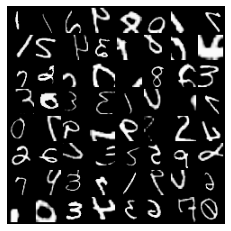

In [8]:
plt.imshow(train_grid_img.permute(1, 2, 0))
plt.axis('off')
plt.show()

#### Display a batch of test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


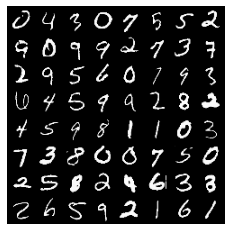

In [9]:
plt.imshow(test_grid_img.permute(1, 2, 0))
plt.axis('off')
plt.show()

## Defining MLP with PyTorch

In [10]:
import torch.nn as nn

In [11]:
class MLP(nn.Module):
    
    def __init__(self, in_features: int=784, hidden_features: int=256, out_features: int=10) -> None:
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(in_features=in_features, out_features=hidden_features)
        self.fc2 = nn.Linear(in_features=hidden_features, out_features=hidden_features)
        self.fc3 = nn.Linear(in_features=hidden_features, out_features=out_features)
        
        self.relu = nn.ReLU()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        return self.fc3(out)

In [12]:
model = MLP()
print(model, '\n\n')

data = torch.randn(10, 1, 28, 28)
with torch.no_grad():
    output = model(data)
print('data.shape: {}'.format(data.size()))
print('output.shape: {}'.format(output.size()))

MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
) 


data.shape: torch.Size([10, 1, 28, 28])
output.shape: torch.Size([10, 10])


### Various Activation Functions

- nn.ReLU()
- nn.Sigmoid()
- nn.Softmax()
- nn.Tanh()
- nn.LeakyReLU()
- nn.GELU()

In practice, the ReLU function is used almost exclusively as the activation function for hidden layers.

## Defining MLP with nn.Sequential()

In [13]:
class MLP(nn.Module):
    
    def __init__(self, in_features: int=784, hidden_features: int=256, out_features: int=10) -> None:
        super(MLP, self).__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features, out_features=out_features)
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [14]:
model = MLP()
print(model, '\n\n')

data = torch.randn(10, 1, 28, 28)
with torch.no_grad():
    output = model(data)
print('data.shape: {}'.format(data.size()))
print('output.shape: {}'.format(output.size()))

MLP(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
) 


data.shape: torch.Size([10, 1, 28, 28])
output.shape: torch.Size([10, 10])


## Defining MLP with Dropout

In [15]:
class MLP(nn.Module):
    
    def __init__(self, in_features: int=784, hidden_features: int=256, out_features: int=10, 
                 rate: float=0.4) -> None:
        super(MLP, self).__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Dropout(p=rate),
            nn.Linear(in_features=hidden_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Dropout(p=rate),
            nn.Linear(in_features=hidden_features, out_features=out_features)
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [16]:
model = MLP()
print(model, '\n\n')

data = torch.randn(10, 1, 28, 28)
with torch.no_grad():
    output = model(data)
print('data.shape: {}'.format(data.size()))
print('output.shape: {}'.format(output.size()))

MLP(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
) 


data.shape: torch.Size([10, 1, 28, 28])
output.shape: torch.Size([10, 10])


### Loss functions

- nn.MSELoss()
- nn.CrossEntropyLoss()
- nn.L1Loss()
- nn.NLLLoss()